## 1. Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

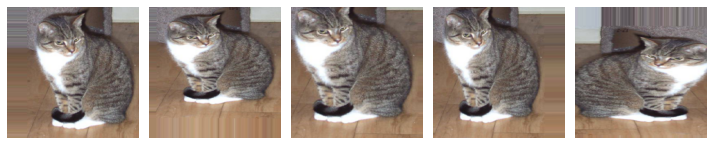

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

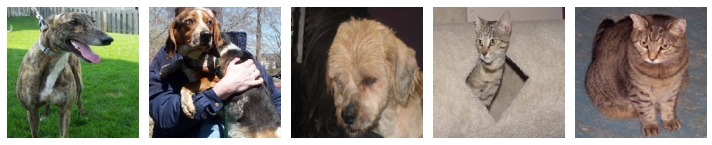

In [12]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

### VGG16 모델 구현하기

In [13]:
from tensorflow.keras import layers, Model

input_layer = layers.Input(shape = (256, 256, 3))

x = layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x = layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)
out_layer = layers.Dense(1, activation='softmax')(x)

model = Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584

In [14]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [15]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 50s 320ms/step - loss: 710.6749 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 36s 288ms/step - loss: 0.6965 - binary_accuracy: 0.5000 - val_loss: 0.6937 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 36s 290ms/step - loss: 0.6942 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 36s 289ms/step - loss: 0.6936 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 36s 288ms/step - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000


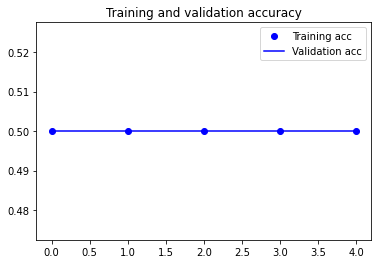

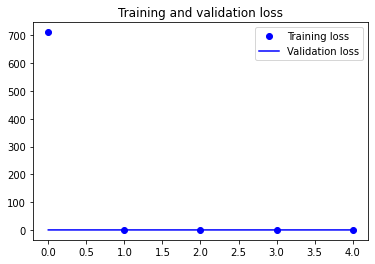

In [16]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 다양한 방법을 활용하여 모델 성능 올리기

In [135]:
# 하이퍼 파라미터 튜닝
batch_size = 64
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [136]:
# 데이터 Generator 생성
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')


Found 2000 images belonging to 2 classes.


In [137]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [138]:
import tensorflow as tf

def dual_net(input_shape=(256, 256, 3)):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Dual 1
    x1 = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(inputs)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    x1 = tf.keras.layers.MaxPooling2D((2, 2))(x1)
    x1 = tf.keras.layers.Conv2D(128, (5, 5), strides=1, activation='relu', padding='same')(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    x1 = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu')(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)

    # Dual 2
    x2 = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(inputs)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    x2 = tf.keras.layers.MaxPooling2D((2, 2))(x2)
    x2 = tf.keras.layers.Conv2D(128, (5, 5), strides=1, activation='relu', padding='same')(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    x2 = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu')(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)

    # Concatenation
    x = tf.keras.layers.Concatenate()([x1, x2])

    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DualNet")
    return model

# 모델 요약 출력
model = dual_net()
model.summary()


Model: "DualNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_179 (Conv2D)             (None, 256, 256, 64) 1792        input_31[0][0]                   
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 256, 256, 64) 1792        input_31[0][0]                   
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, 256, 256, 64) 256         conv2d_179[0][0]                 
____________________________________________________________________________________________

In [139]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [140]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      validation_freq=1)

Epoch 1/10
31/31 [==============================] - 30s 923ms/step - loss: 0.8552 - accuracy: 0.5459 - val_loss: 0.7012 - val_accuracy: 0.5030
Epoch 2/10
31/31 [==============================] - 29s 905ms/step - loss: 0.7965 - accuracy: 0.5713 - val_loss: 0.7008 - val_accuracy: 0.5390
Epoch 3/10
31/31 [==============================] - 28s 882ms/step - loss: 0.7067 - accuracy: 0.5645 - val_loss: 0.6876 - val_accuracy: 0.5360
Epoch 4/10
31/31 [==============================] - 28s 903ms/step - loss: 0.6792 - accuracy: 0.5664 - val_loss: 0.7388 - val_accuracy: 0.5010
Epoch 5/10
31/31 [==============================] - 28s 902ms/step - loss: 0.6933 - accuracy: 0.5527 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 6/10
31/31 [==============================] - 28s 886ms/step - loss: 0.6734 - accuracy: 0.5794 - val_loss: 0.6879 - val_accuracy: 0.5120
Epoch 7/10
31/31 [==============================] - 28s 902ms/step - loss: 0.6715 - accuracy: 0.5654 - val_loss: 0.7005 - val_accuracy: 0.5080

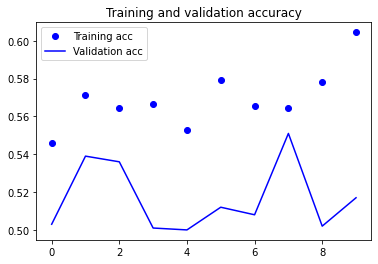

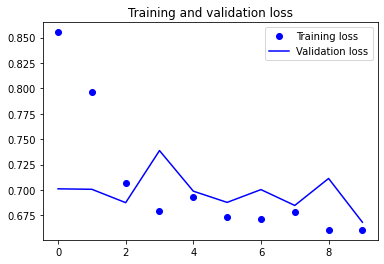

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- accuracy 55%까지 달성하였습니다.
- batch size를 키울수록 성능이 좋아지는 것 같습니다.
- 모델은 직접 기획해보았고 기획한 내용을 바탕으로 구현하였습니다. (DualNet)
- loss를 categorical_crossentropy로 바꾸고 학습률을 0.001로 변경하였습니다.

## 2. Object Detection

In [101]:
!pip3 install tensorflow-estimator==2.6.0 -qq

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
tensorflow-gpu 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.0.1 which is incompatible.


In [102]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [105]:
def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [106]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
    _, filename = tempfile.mkstemp(suffix=".jpg")
    response = urlopen(url)
    image_data = response.read()
    image_data = BytesIO(image_data)  # 이미지 읽기
    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
    pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
    pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
    print("Image downloaded to %s." % filename)
    if display:
        display_image(pil_image)
    return filename

In [113]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)

    # Draw bounding box
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=thickness,
              fill=color)

    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height

    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


In [108]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                                  25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    # BBox 그리기 적용
    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                            int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(
                image_pil,
                ymin,
                xmin,
                ymax,
                xmax,
                color,
                font,
                display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
    return image


Image downloaded to /tmp/tmpu_5eh0ge.jpg.


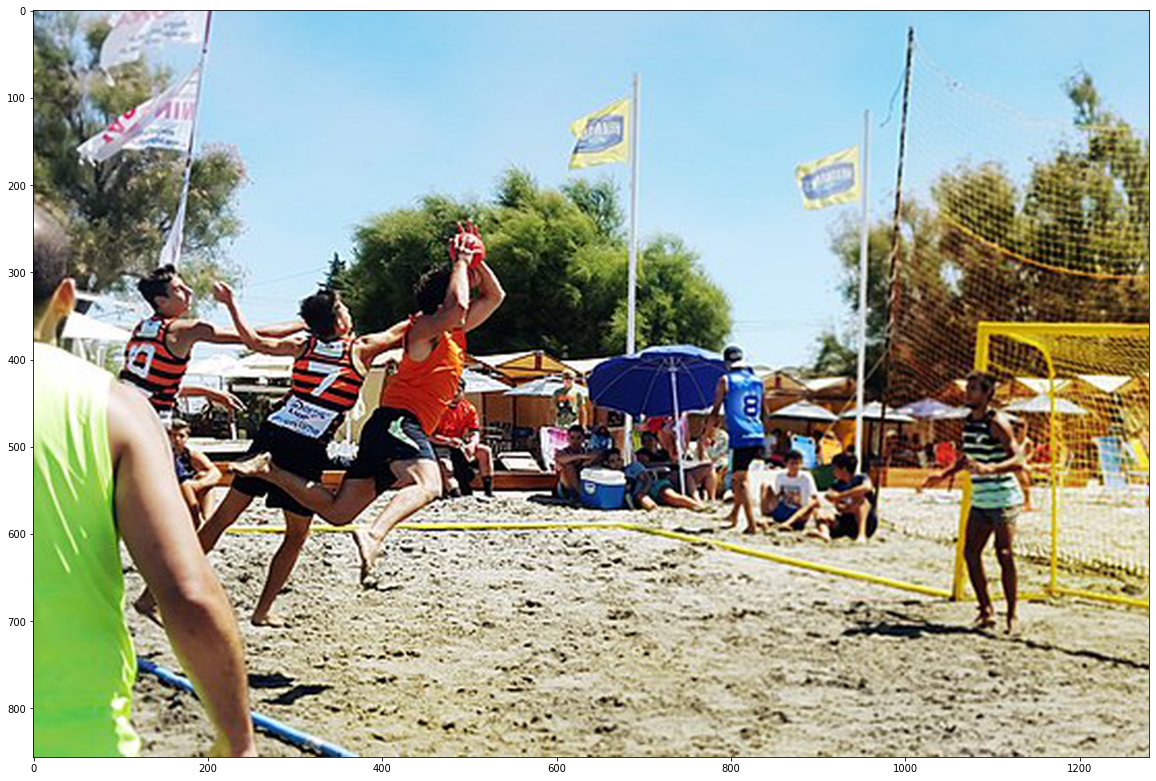

In [109]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [110]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [111]:
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

In [112]:
def run_detector(detector, path):
    img = load_img(path) 

    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    # 소요시간 측정
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}

    # 이미지 추론 개수와 추론 시간 출력
    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time - start_time)

    # 이미지 내 박스로 entity, scores를 추가하여 출력
    image_with_boxes = draw_boxes(
        img.numpy(), result["detection_boxes"],
        result["detection_class_entities"], result["detection_scores"])

    display_image(image_with_boxes)


Found 100 objects.
Inference time:  47.40361714363098


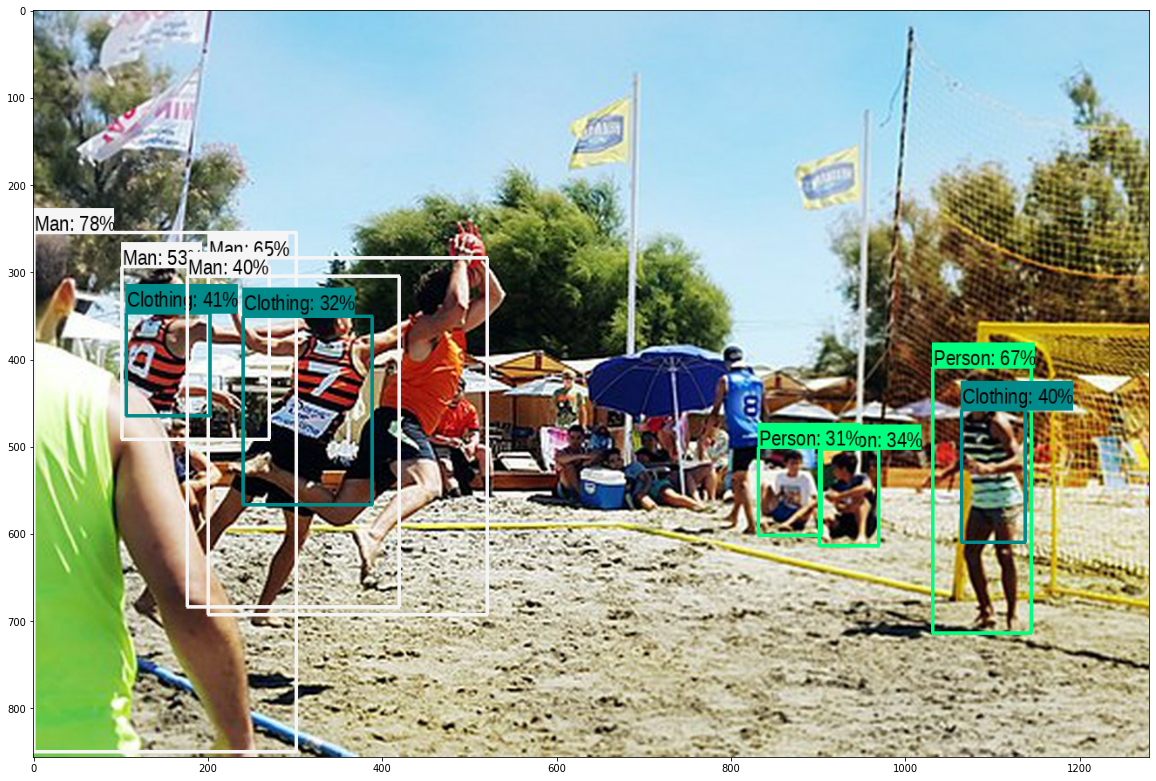

In [114]:
run_detector(detector, downloaded_image_path)

### 다른 이미지에서 테스트 해보기

Image downloaded to /tmp/tmpkw9_gs46.jpg.


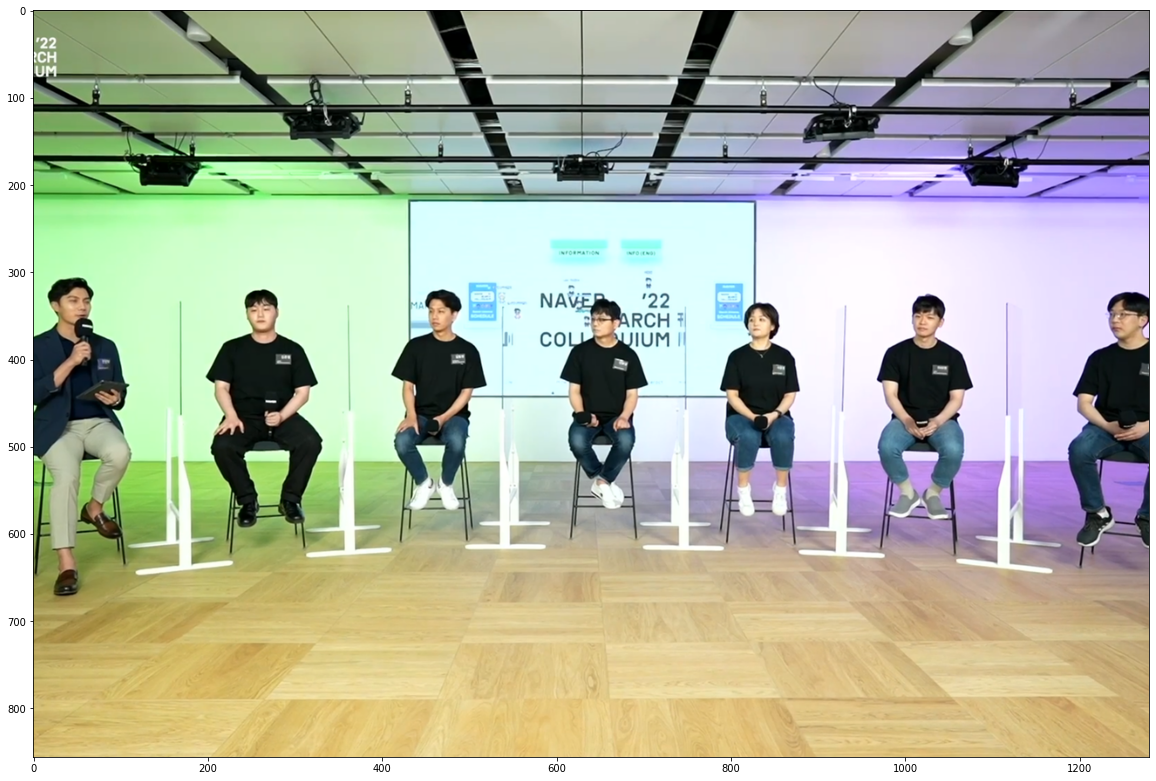

In [116]:
image_url = "https://images.squarespace-cdn.com/content/v1/54d0280ae4b0424c03ab6474/69f2f64a-ac99-4ed1-b90b-595bb9660bd8/Naver_Panel_Discussion.png"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

Found 100 objects.
Inference time:  1.4901962280273438


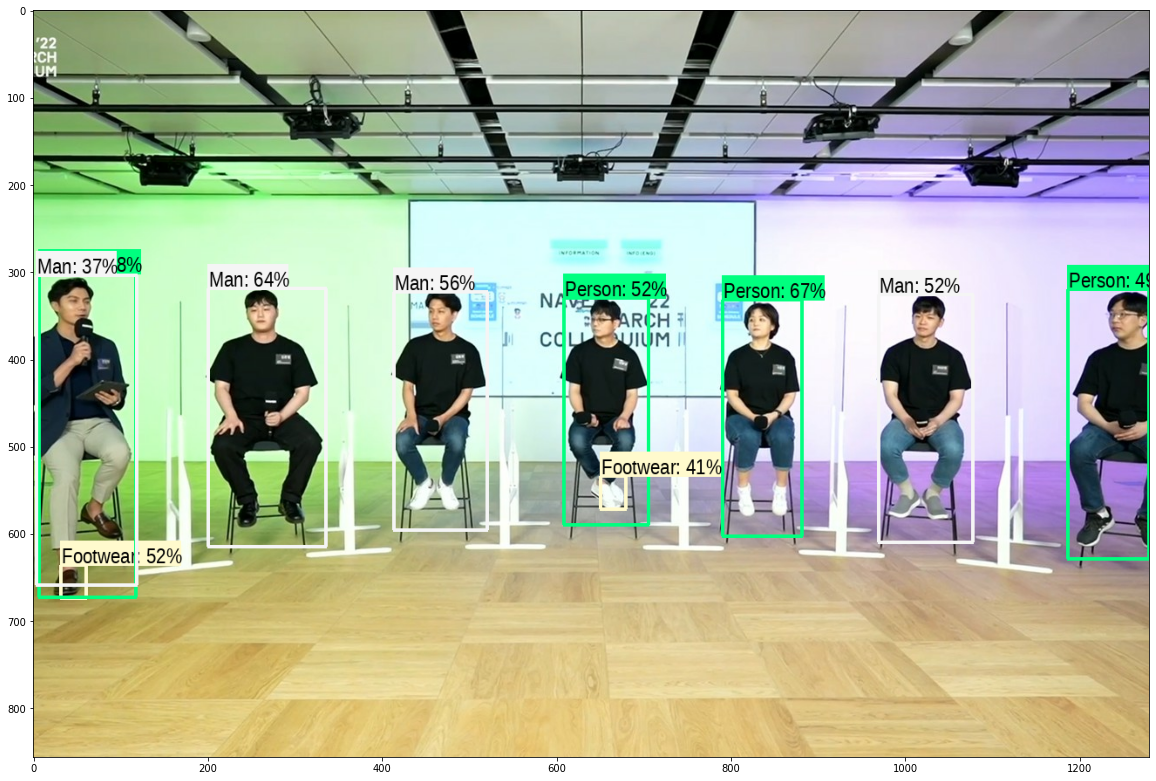

In [117]:
run_detector(detector, downloaded_image_path)

### 다양한 pre-trained model 테스트 해보기
- mobileNet v2

In [118]:
detector = hub.load("https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow1/variations/openimages-v4-ssd-mobilenet-v2/versions/1").signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Inference time:  7.180488348007202


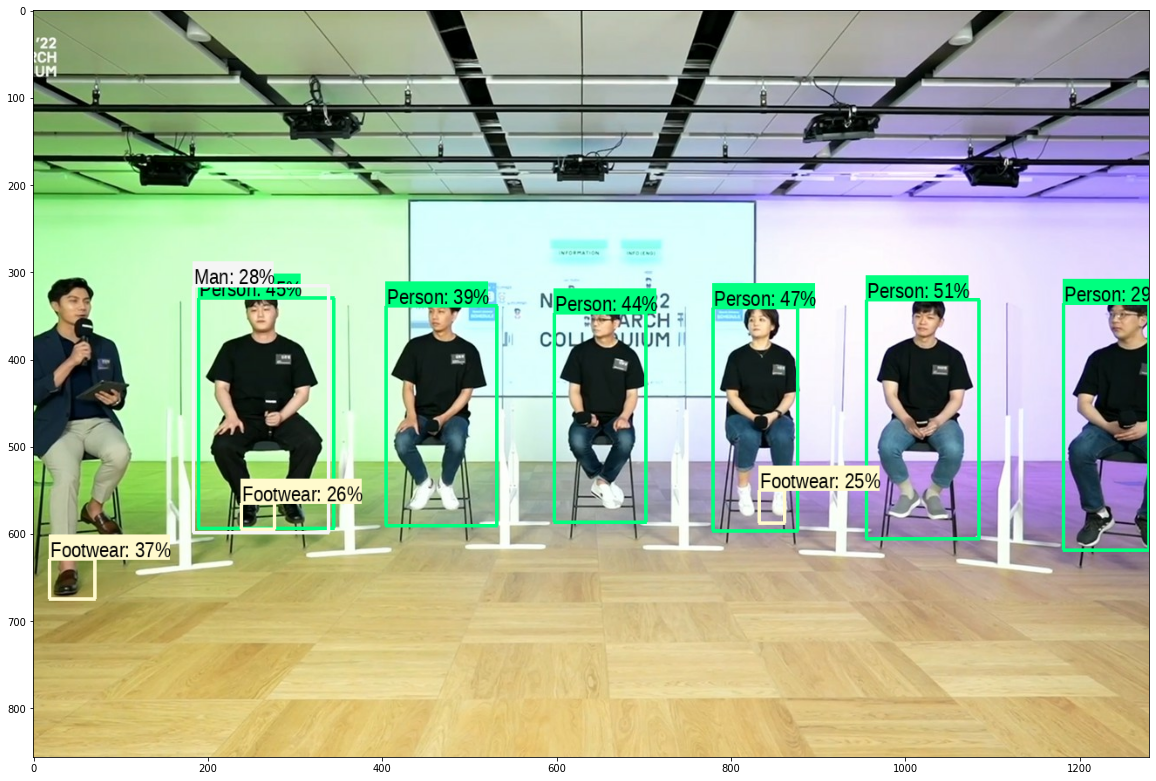

In [119]:
run_detector(detector, downloaded_image_path)

In [143]:
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 MobileNetV3는 더 느리고 더욱 낮은 성능을 보여줬습니다.") 
print("사전학습 데이터와 테스트를 진행한 데이터의 도메인 차이인 것 같습니다.")

1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.
2번째 모델인 MobileNetV3는 더 느리고 더욱 낮은 성능을 보여줬습니다.
사전학습 데이터와 테스트를 진행한 데이터의 도메인 차이인 것 같습니다.
